In [ ]:
1.#Importing Essential Libraries
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression

In [ ]:
#Ignoring warnings

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

2. Reading the .CSV File


In [ ]:
# Load the CSV data into a Pandas DataFrame
df=pd.read_csv("/content/laptops.csv")

In [ ]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [ ]:
#looking for first five rows of the data

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
#looking for random five samples of the data

df.sample(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1867,Gigabyte AORUS 15P KC-8ES2130SH Intel Core i7-...,Refurbished,Gigabyte,Aorus,Intel Core i7,16,512,SSD,RTX 3060,15.6,No,1043.24
621,HP ProBook 450 G9 Intel Core i7-1255U/16GB/1TB...,New,HP,ProBook,Intel Core i7,16,1000,SSD,NaN,15.6,No,1312.00
1582,Lenovo V15 IIL Intel Celeron N4020/4GB/256GB S...,New,Lenovo,V15,Intel Celeron,4,256,SSD,NaN,15.6,No,361.00
888,PcCom Revolt 3060 Intel Core i7-12700H/32GB/1T...,New,PcCom,Revolt,Intel Core i7,32,1000,SSD,RTX 3060,15.6,No,1800.01
194,HP Victus 16-e1007ns AMD Ryzen 7 6800H/16GB/51...,New,HP,Victus,AMD Ryzen 7,16,512,SSD,RTX 3050,16.1,No,1099.00


In [ ]:
#looking for last five rows of the data

df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


Data Preprocessing

1.Desciption of the dataframe

In [ ]:
#Laptop of the dataset
df.shape

(2160, 12)

In [ ]:
#reading the feature names of the dataset

df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [ ]:
#counting total number of null values

df.isnull().sum().sum()

1417

In [ ]:
# Check if there any null values in the dataframe
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

From the above there are missing values in three variables: "storage type", "GPU", and "Screen". Particularly, the variables "GPU" and "Sotarage type" have a significant number of missing values.So that if we fill the missing values of these variables with the ffill the data.

In [ ]:
df=df.rename(columns={"Final Price":"Price","Storage type":"Storagetype"})

In [ ]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storagetype,GPU,Screen,Touch,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [ ]:
df['Screen'].fillna(method='ffill', inplace=True)

In [ ]:
df.Screen.unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       11.6 , 13.  , 10.5 , 14.4 , 12.3 , 15.4 , 12.5 , 10.1 , 10.95,
       12.  , 13.9 ])

In [ ]:
df['GPU'].fillna(method='bfill', inplace=True)

In [ ]:
df.GPU.unique()

array(['RTX 3050', 'RTX 4060', 'RTX 4050', 'RTX 3060', 'RTX 4070',
       'RTX 2050', 'GTX 1650', 'RTX 3070', '610 M', 'RTX 4080',
       'RX 6500M', 'MX 550', 'RTX 3080', 'RTX 4090', 'RX 7600S', 'A 370M',
       'GTX 1660', 'RTX A1000', 'RTX 3000', 'T 1200', 'Radeon Pro 5300M',
       'A 730M', 'Radeon Pro RX 560X', 'RTX A5500', 'Radeon Pro 5500M',
       'T 500', 'T 550', 'RTX A3000', 'T 2000', 'T 600', 'T 1000',
       'Radeon RX 6600M', 'MX 330', 'RTX A2000', 'MX 450', 'RTX 2070',
       'RX 6800S', 'RTX 2080', 'RTX 2060', 'GTX 1050', 'MX 130', 'P 500',
       'RX 6700M', 'GTX 1070', nan], dtype=object)

In [ ]:
df['Storagetype'].fillna(method='ffill', inplace=True)

In [ ]:
df.Storagetype.unique()

array(['SSD', 'eMMC'], dtype=object)

In [ ]:
df.head(2000)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storagetype,GPU,Screen,Touch,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 3050,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 3050,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 3050,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,RTX 4060,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Lenovo Yoga 9 14ITL5 Intel Evo Core i7-1185G7/...,Refurbished,Lenovo,Yoga,Intel Evo Core i7,16,1000,SSD,GTX 1650,14.0,Yes,1999.00
1996,Lenovo Yoga C930-13IKB Intel Core i5-8250U/8GB...,Refurbished,Lenovo,Yoga,Intel Core i5,8,512,SSD,GTX 1650,13.9,Yes,989.47
1997,Lenovo Yoga Creator 7 15IMH05 Intel Core i7-10...,Refurbished,Lenovo,Yoga,Intel Core i7,16,512,SSD,GTX 1650,15.6,No,786.84
1998,Lenovo Yoga S940-14IIL Intel Core i7-1065G7/16...,Refurbished,Lenovo,Yoga,Intel Core i7,16,1000,SSD,Radeon Pro 5500M,14.0,No,1999.00


In [ ]:
1.# Compare the prices of laptops from different brands and models to identify budget-friendly options.
# Filter and sort the DataFrame by price in ascending order
sorted_df = df[['Brand', 'Model','Price']].sort_values(by='Price')
budget_threshold = 600
budget_friendly_laptops = sorted_df[sorted_df['Price'] <= budget_threshold]
budget_friendly_laptops

,Brand,Model,Price
668,Thomson,Neo,201.05
505,Primux,Ioxbook,208.99
638,HP,EliteBook,210.14
554,Primux,Ioxbook,229.00
728,HP,Chromebook,230.14
...,...,...,...
497,Microsoft,Surface Go,599.01
39,HP,15S,599.01
1038,Primux,Ioxbook,599.41
872,Asus,VivoBook,599.99


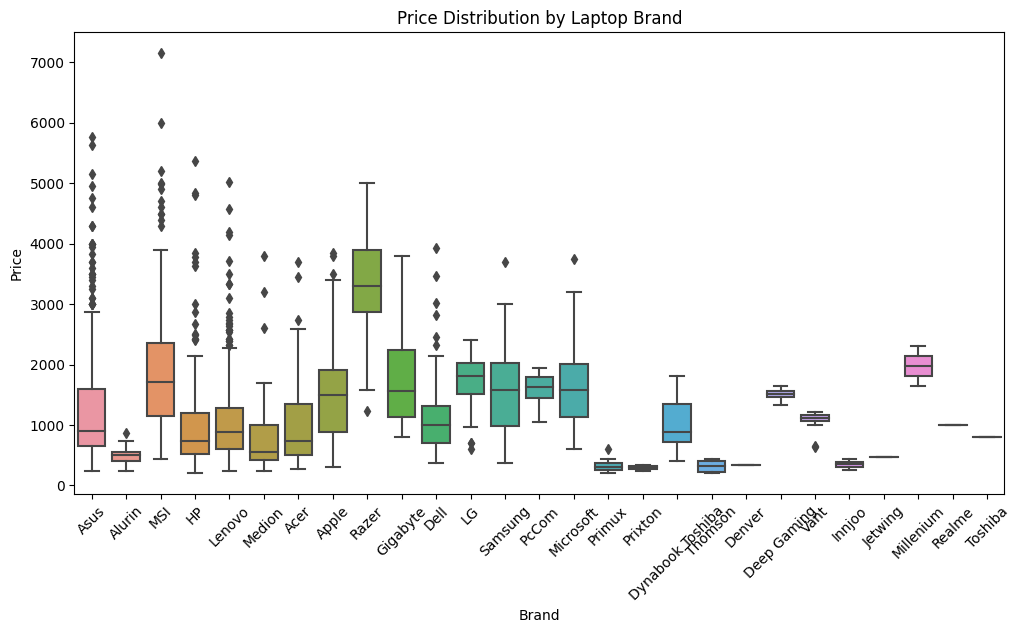

In [ ]:
#Visualization:
# Box Plot - Price Distribution by Brand:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Price Distribution by Laptop Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In the above we perform different models Brands and Price. firstly we sort the valuses of 'Brand','Model','price'and then  the box plot visualisation figure shows Asus having more outliers and budget friendly Laptops of Brand,Model, and Price.

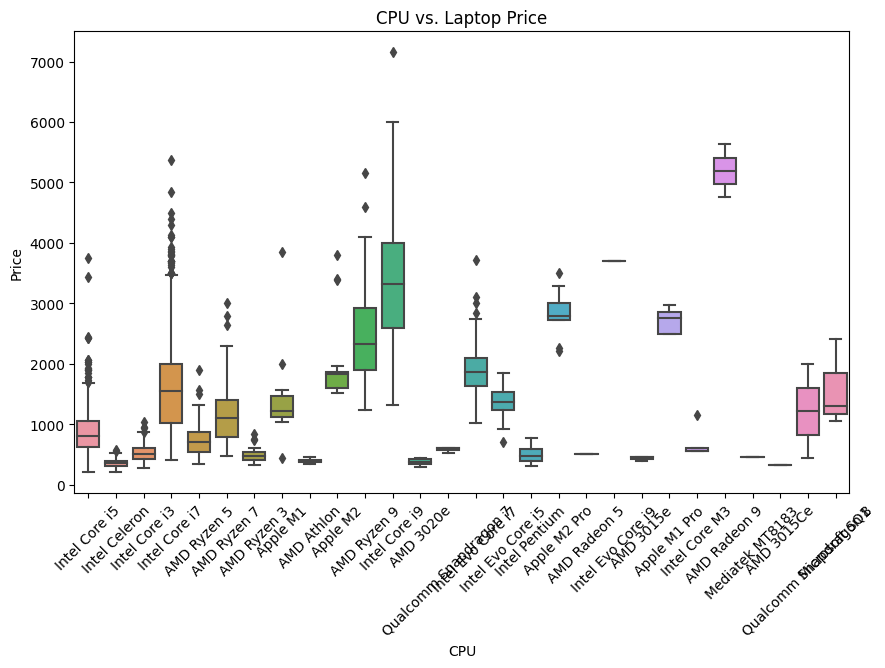

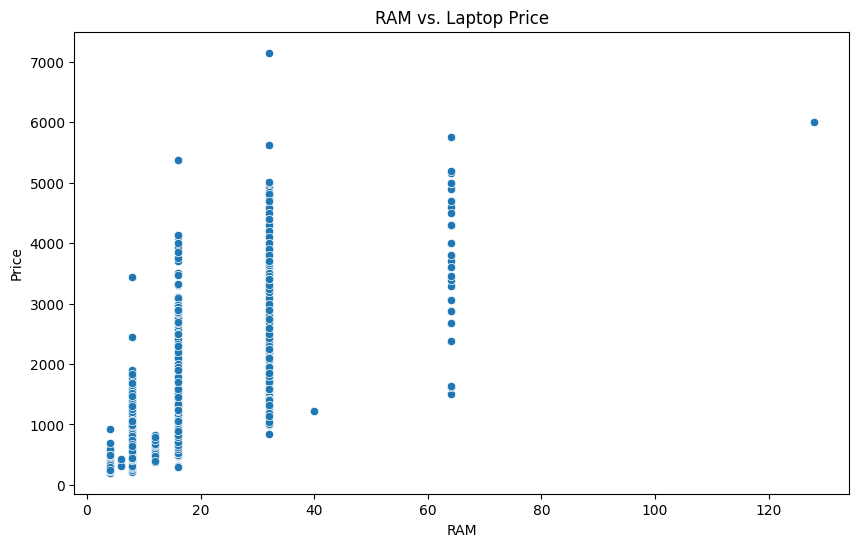

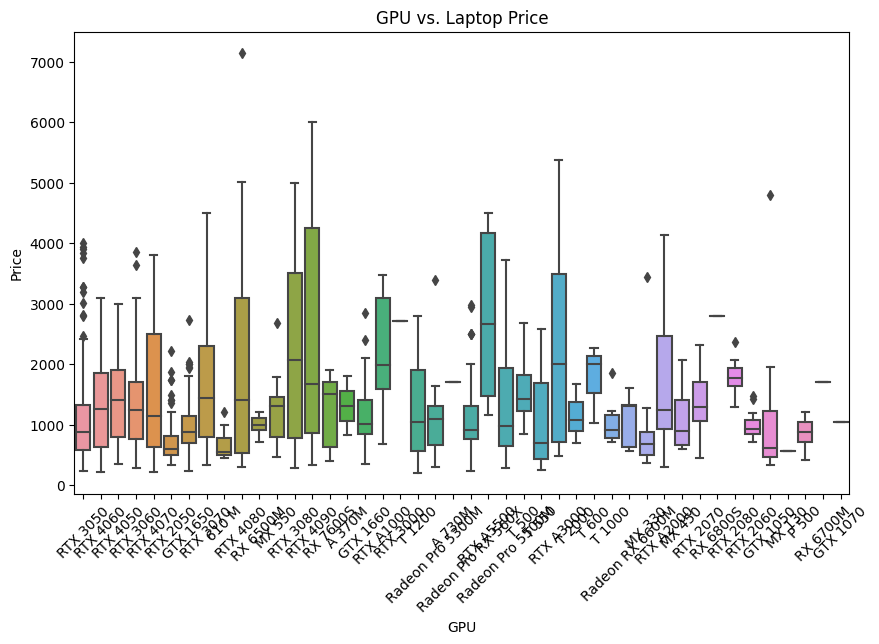

In [ ]:
2.# Laptop Performance Analysis: Analyze CPU, RAM, and GPU specifications to assess the performance capabilities of different laptops.
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of CPU types vs. laptop prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CPU', y='Price')
plt.xticks(rotation=45)
plt.xlabel('CPU')
plt.ylabel('Price')
plt.title('CPU vs. Laptop Price')
plt.show()

# Scatter plot of RAM vs. laptop prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('RAM vs. Laptop Price')
plt.show()

# Box plot of GPU types vs. laptop prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GPU', y='Price')
plt.xticks(rotation=45)
plt.xlabel('GPU')
plt.ylabel('Price')
plt.title('GPU vs. Laptop Price')
plt.show()


Analyze CPU, RAM, and GPU specifications to assess the performance capabilities of different laptops:By using visualisation box plot "CPU" vs "Price" , "inteli3" having more outliers,By using scatterplot of  "RAM" vs "Price" and also performing of box plot of "GPU" vs "Price" , "RTX3050"  having more outliers

In [ ]:
13.#Compare the prices of touch-enabled and non-touch laptop.

df.Touch.value_counts()

No     1933
Yes     227
Name: Touch, dtype: int64

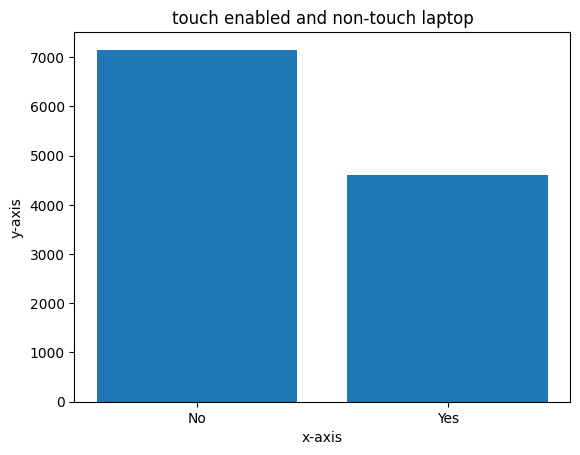

In [ ]:
x=df.Touch
y=df.Price
plt.bar(x,y,data=df)
plt.title("touch enabled and non-touch laptop")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

above plotting shows the touch enable and non touch enabledbut  
non touch enables are more in data


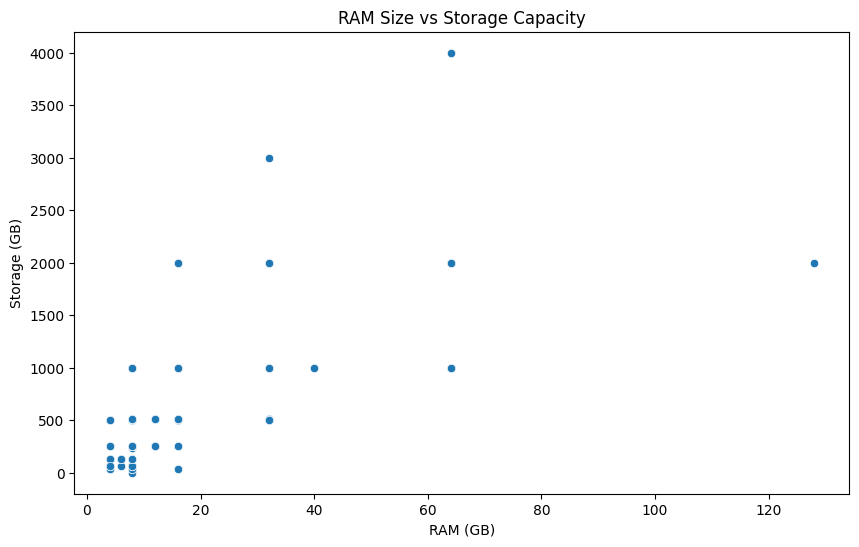

In [ ]:
12.#Investigate the relationship between RAM size and storage capacity in laptops.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Storage', data=df)
plt.title('RAM Size vs Storage Capacity')
plt.xlabel('RAM (GB)')
plt.ylabel('Storage (GB)')
plt.show()


In [ ]:
correlation = df['RAM'].corr(df['Storage'])
print(f"Correlation between RAM and Storage: {correlation:.2f}")


Correlation between RAM and Storage: 0.75


ram and storage has positive correlation

In [ ]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storagetype,GPU,Screen,Touch,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 3050,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 3050,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 3050,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,RTX 4060,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [ ]:
3.# Compare laptops with HDD and SSD storage to understand their differences in speed and performance
# Data preprocessing - assuming relevant columns are 'storage_type', 'cpu_speed', 'ram', 'disk_speed', etc.
hdd_laptops = df[df['Storagetype'] == 'HDD']
ssd_laptops = df[df['Storagetype'] == 'SSD']



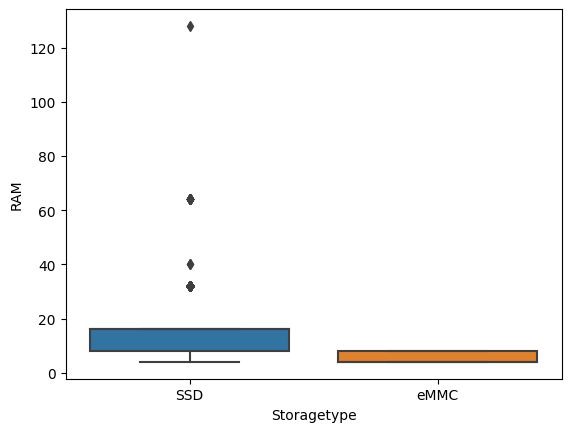

In [ ]:
# Data visualization
sns.boxplot(x='Storagetype', y='RAM', data=df)
plt.show()

<Axes: xlabel='Storage', ylabel='CPU'>

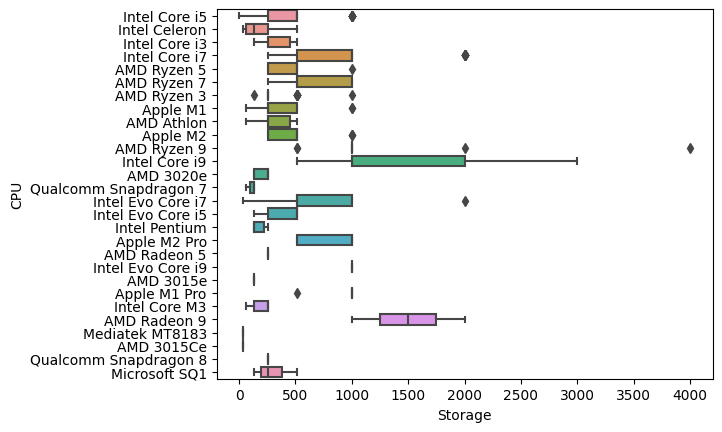

In [ ]:

sns.boxplot(x='Storage', y='CPU', data=df)


<Axes: xlabel='Storagetype', ylabel='Storage'>

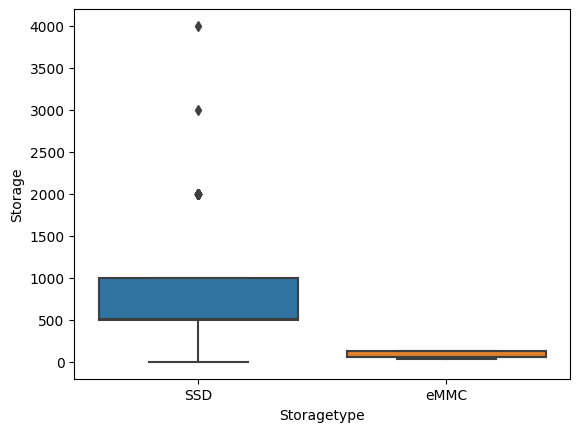

In [ ]:
sns.boxplot(x='Storagetype', y='Storage', data=df)

In [ ]:
from scipy.stats import ttest_ind


In [ ]:
# Statistical analysis - t-test for example
cpu_hdd = hdd_laptops['CPU']
cpu_ssd = ssd_laptops['CPU']
t_stat, p_value = ttest_ind(cpu_hdd, cpu_ssd)

if p_value < 0.05:
    print("There is a significant difference in CPU speed between HDD and SSD laptops.")
else:
    print("There is no significant difference in CPU speed between HDD and SSD laptops.")

There is no significant difference in CPU speed between HDD and SSD laptops.


 Columns are 'storage_type', 'cpu', 'ram' in storage type has hdd and sdd and then visualization of storage type and cpu and then stastical analysis of t-test for hdd Laptops and ssd Laptops and there is no significant difference in CPU speed between HDD and SSD Laptops

In [ ]:
4.# Study the relationship between screen size, touch-enabled screens, and laptop prices.
# Data preprocessing - the columns are 'Screen', 'Touch', and 'Price'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

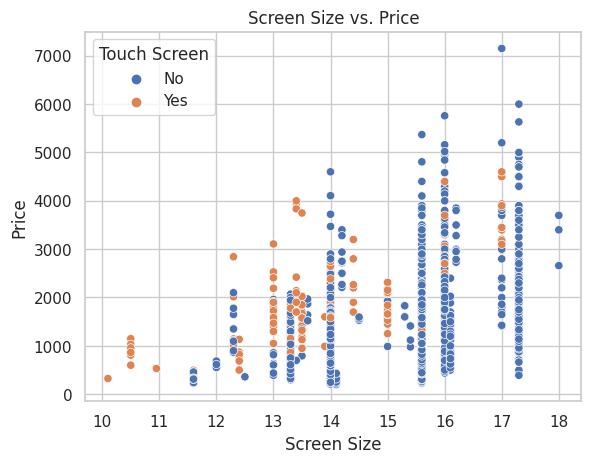

In [ ]:
# Scatter plot of screen size vs. price, color-coded by touch-enabled screens
sns.scatterplot(data=df, x='Screen', y='Price', hue='Touch')
plt.title('Screen Size vs. Price')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.legend(title='Touch Screen')
plt.show()

<Axes: xlabel='Touch', ylabel='Price'>

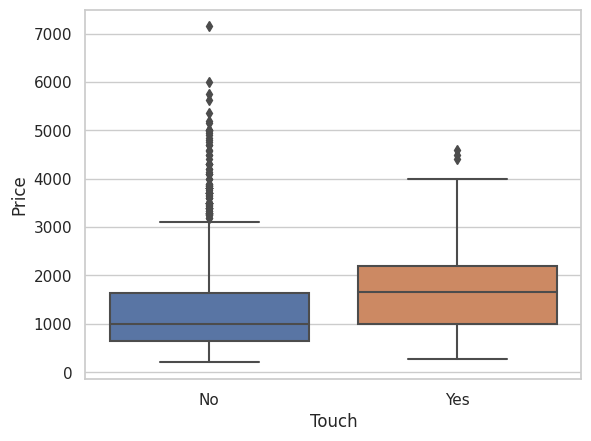

In [ ]:
sns.boxplot(x='Touch', y='Price', data=df)


In [ ]:
# Statistical Analysis
correlation = df['Screen'].corr(df['Price'])
print(f"Correlation between Screen and Price: {correlation}")

Correlation between Screen and Price: 0.26768060496586965


screen and price has postive **correlation** and perform correlation analysis of "Screen","price".

Correlation Analysis: Explore correlations between different Laptop parameters to understand how they are related to each other of screen and price.

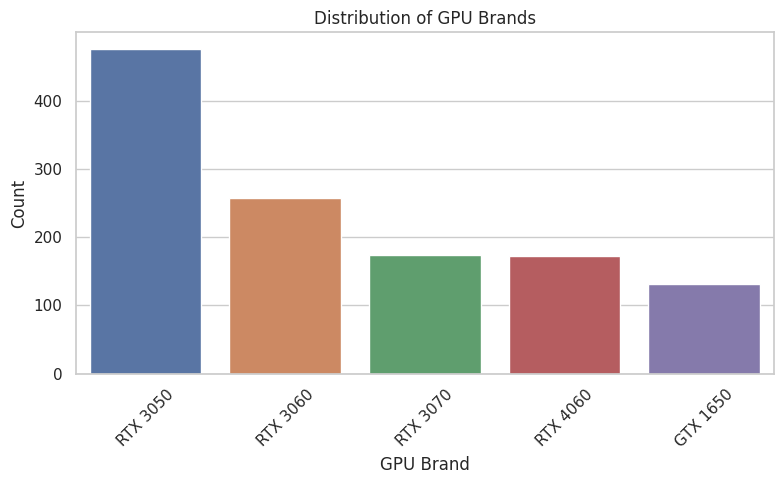

In [ ]:
#7.Compare the GPU specifications of laptops to understand their gaming and graphics capabilities.
# Data exploration - GPU brand distribution
gpu_brand_counts = df['GPU'].value_counts().head()
plt.figure(figsize=(8, 5))
sns.barplot(x=gpu_brand_counts.index, y=gpu_brand_counts.values)
plt.xlabel('GPU Brand')
plt.ylabel('Count')
plt.title('Distribution of GPU Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

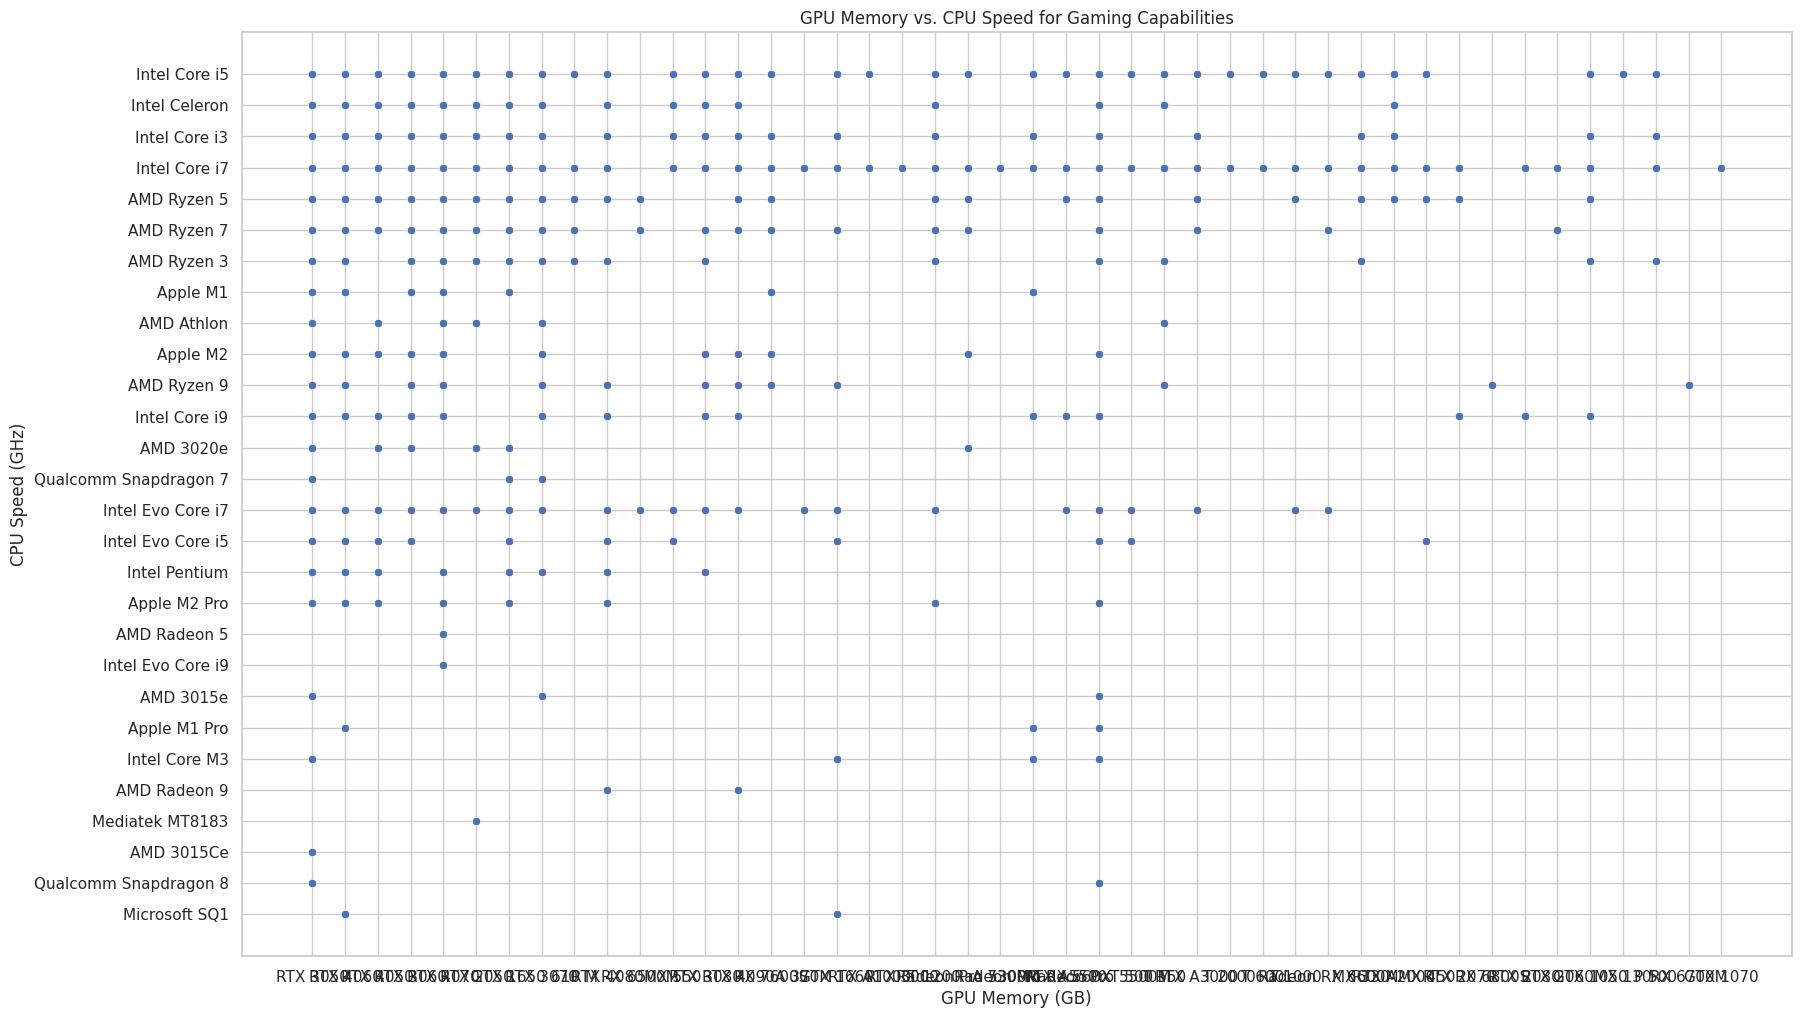

In [ ]:
# Scatter plot: GPU Memory vs. CPU Speed for gaming capabilities comparison
plt.figure(figsize=(20, 12))
sns.scatterplot(x='GPU', y='CPU', data=df)
plt.xlabel('GPU Memory (GB)')
plt.ylabel('CPU Speed (GHz)')
plt.title('GPU Memory vs. CPU Speed for Gaming Capabilities')
plt.show()

 The GPU specifications of laptops to understand their gaming and graphics capabilities by using valuecounts and visualisation

In [ ]:
8. # Analyze the availability status of laptops to identify popular and in-demand models.
# Group by laptop model and count availability
model_availability = df['Model'].value_counts()


In [ ]:
top_n = 10  # Change this to the desired number of top models
popular_models = model_availability.head(top_n)


In [ ]:
# Display the top popular models
print("Top Popular and In-Demand Laptop Models:")
print(popular_models)

Top Popular and In-Demand Laptop Models:
15S            115
IdeaPad        104
ROG            101
ThinkPad        99
VivoBook        99
MacBook Pro     68
TUF             58
V15             56
Chromebook      50
MacBook Air     44
Name: Model, dtype: int64


in the above displaying Top Popular and In-Demand Laptop Models

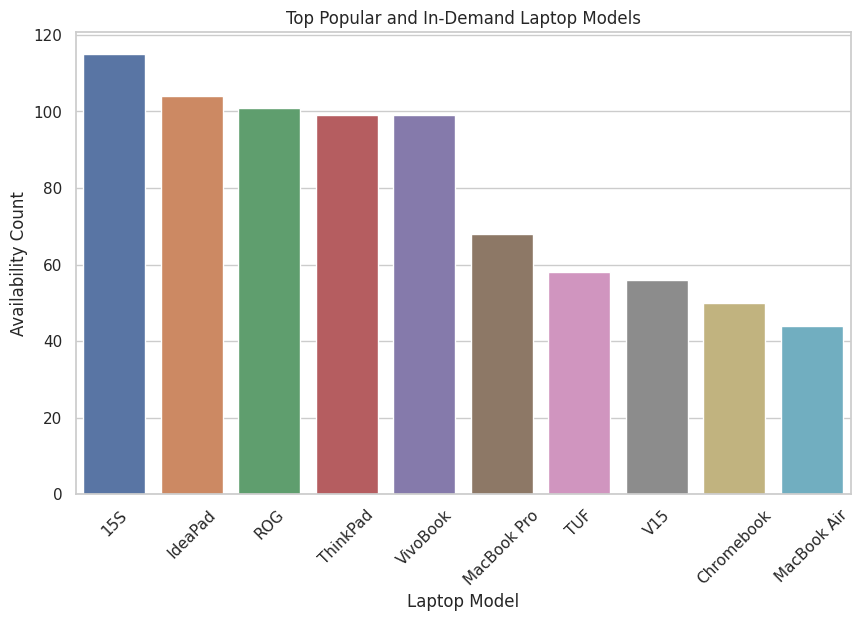

In [ ]:
# Create a bar plot of top popular models
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_models.index, y=popular_models.values)
plt.xticks(rotation=45)
plt.xlabel('Laptop Model')
plt.ylabel('Availability Count')
plt.title('Top Popular and In-Demand Laptop Models')
plt.show()

performing the visualisation of laptop model and availability count by using barplot

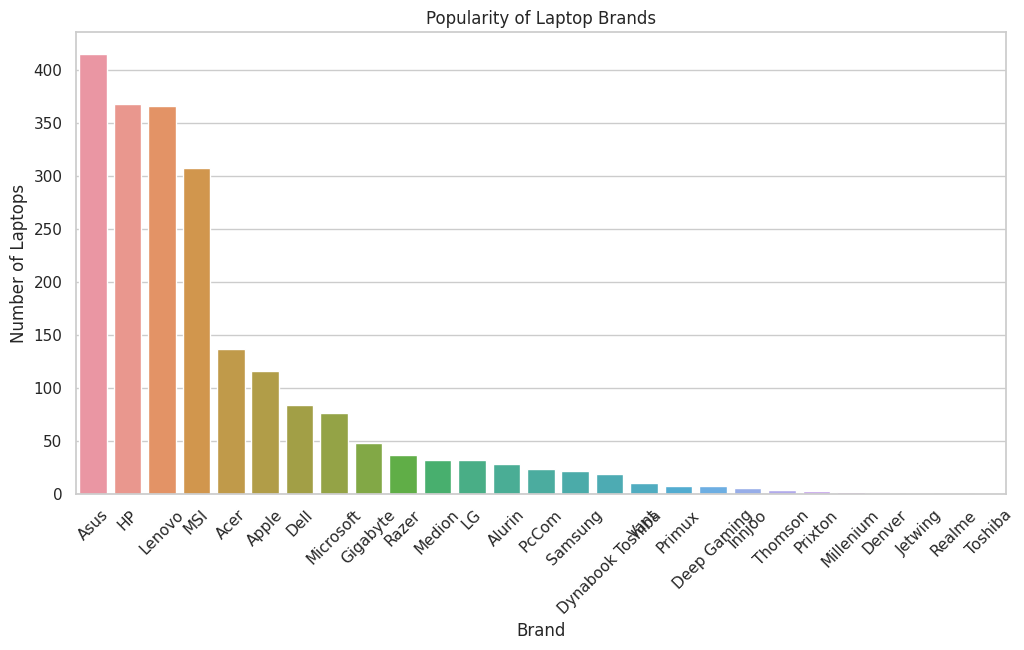

In [ ]:
5.# Popular Laptop Brands: Identify the most popular laptop brands based on their presence in the dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts()

# Create a bar plot to visualize brand popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.title('Popularity of Laptop Brands')
plt.show()



The most popular laptop brands based on their presence
Asus is the highest Brand in the data set

In [ ]:
6.#Trends in Laptop Specifications: Explore trends in laptop specifications over time to identify advancements in technology.
# Group by Laptop and calculate mean specifications
specifications = ['Brand', 'CPU', 'Storage', 'Screen']

In [ ]:
mean_specs_by_Laptop = df.groupby('Laptop')[specifications].mean()


In [ ]:
df.corr()

,RAM,Storage,Screen,Price
RAM,1.000000,0.751297,0.360973,0.724946
Storage,0.751297,1.000000,0.397604,0.695631
Screen,0.360973,0.397604,1.000000,0.267681
Price,0.724946,0.695631,0.267681,1.000000


In [ ]:
correlation_matrix = df[specifications].corr()


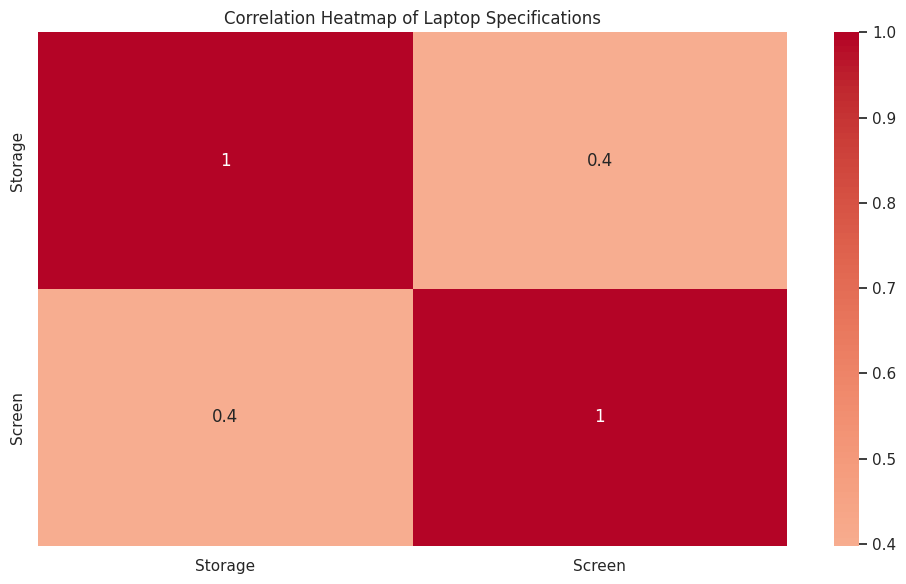

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Laptop Specifications')
plt.tight_layout()
plt.show()

The figure shows that there is correlation between our specification "Storage","Screeen". and all other feautures.we are doing heat map of Laptop specification

In [ ]:
10.#Laptop Screen Size Distribution: Study the distribution of laptop screen sizes to understand market preferences.
g=df.groupby('Screen').agg({'Price':'sum'})

In [ ]:
g

,Price
Screen,
10.10,324.00
10.50,6262.08
10.95,531.00
11.60,5734.09
12.00,2405.89
12.30,19203.41
12.40,4781.82
12.50,358.99
13.00,39418.46


laptop screen sizes to understand market preferences in the above

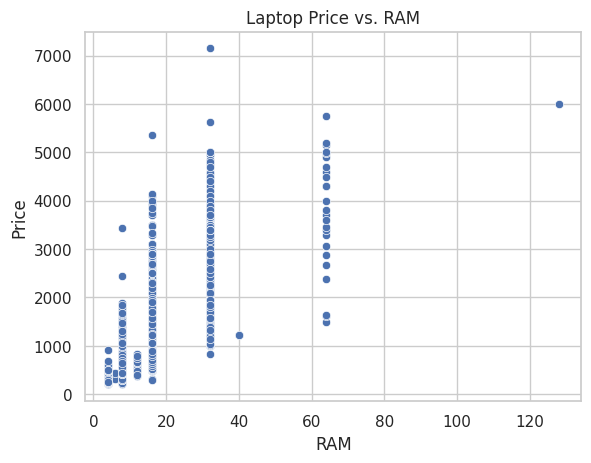

In [ ]:
9.# Laptop Price Range: Determine the price range of laptops and identify the factors influencing their pricing.
# Scatter plot of laptop price vs. a specific feature (e.g., RAM)
sns.scatterplot(data=df, x='RAM', y='Price')
plt.title('Laptop Price vs. RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

# New Section

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


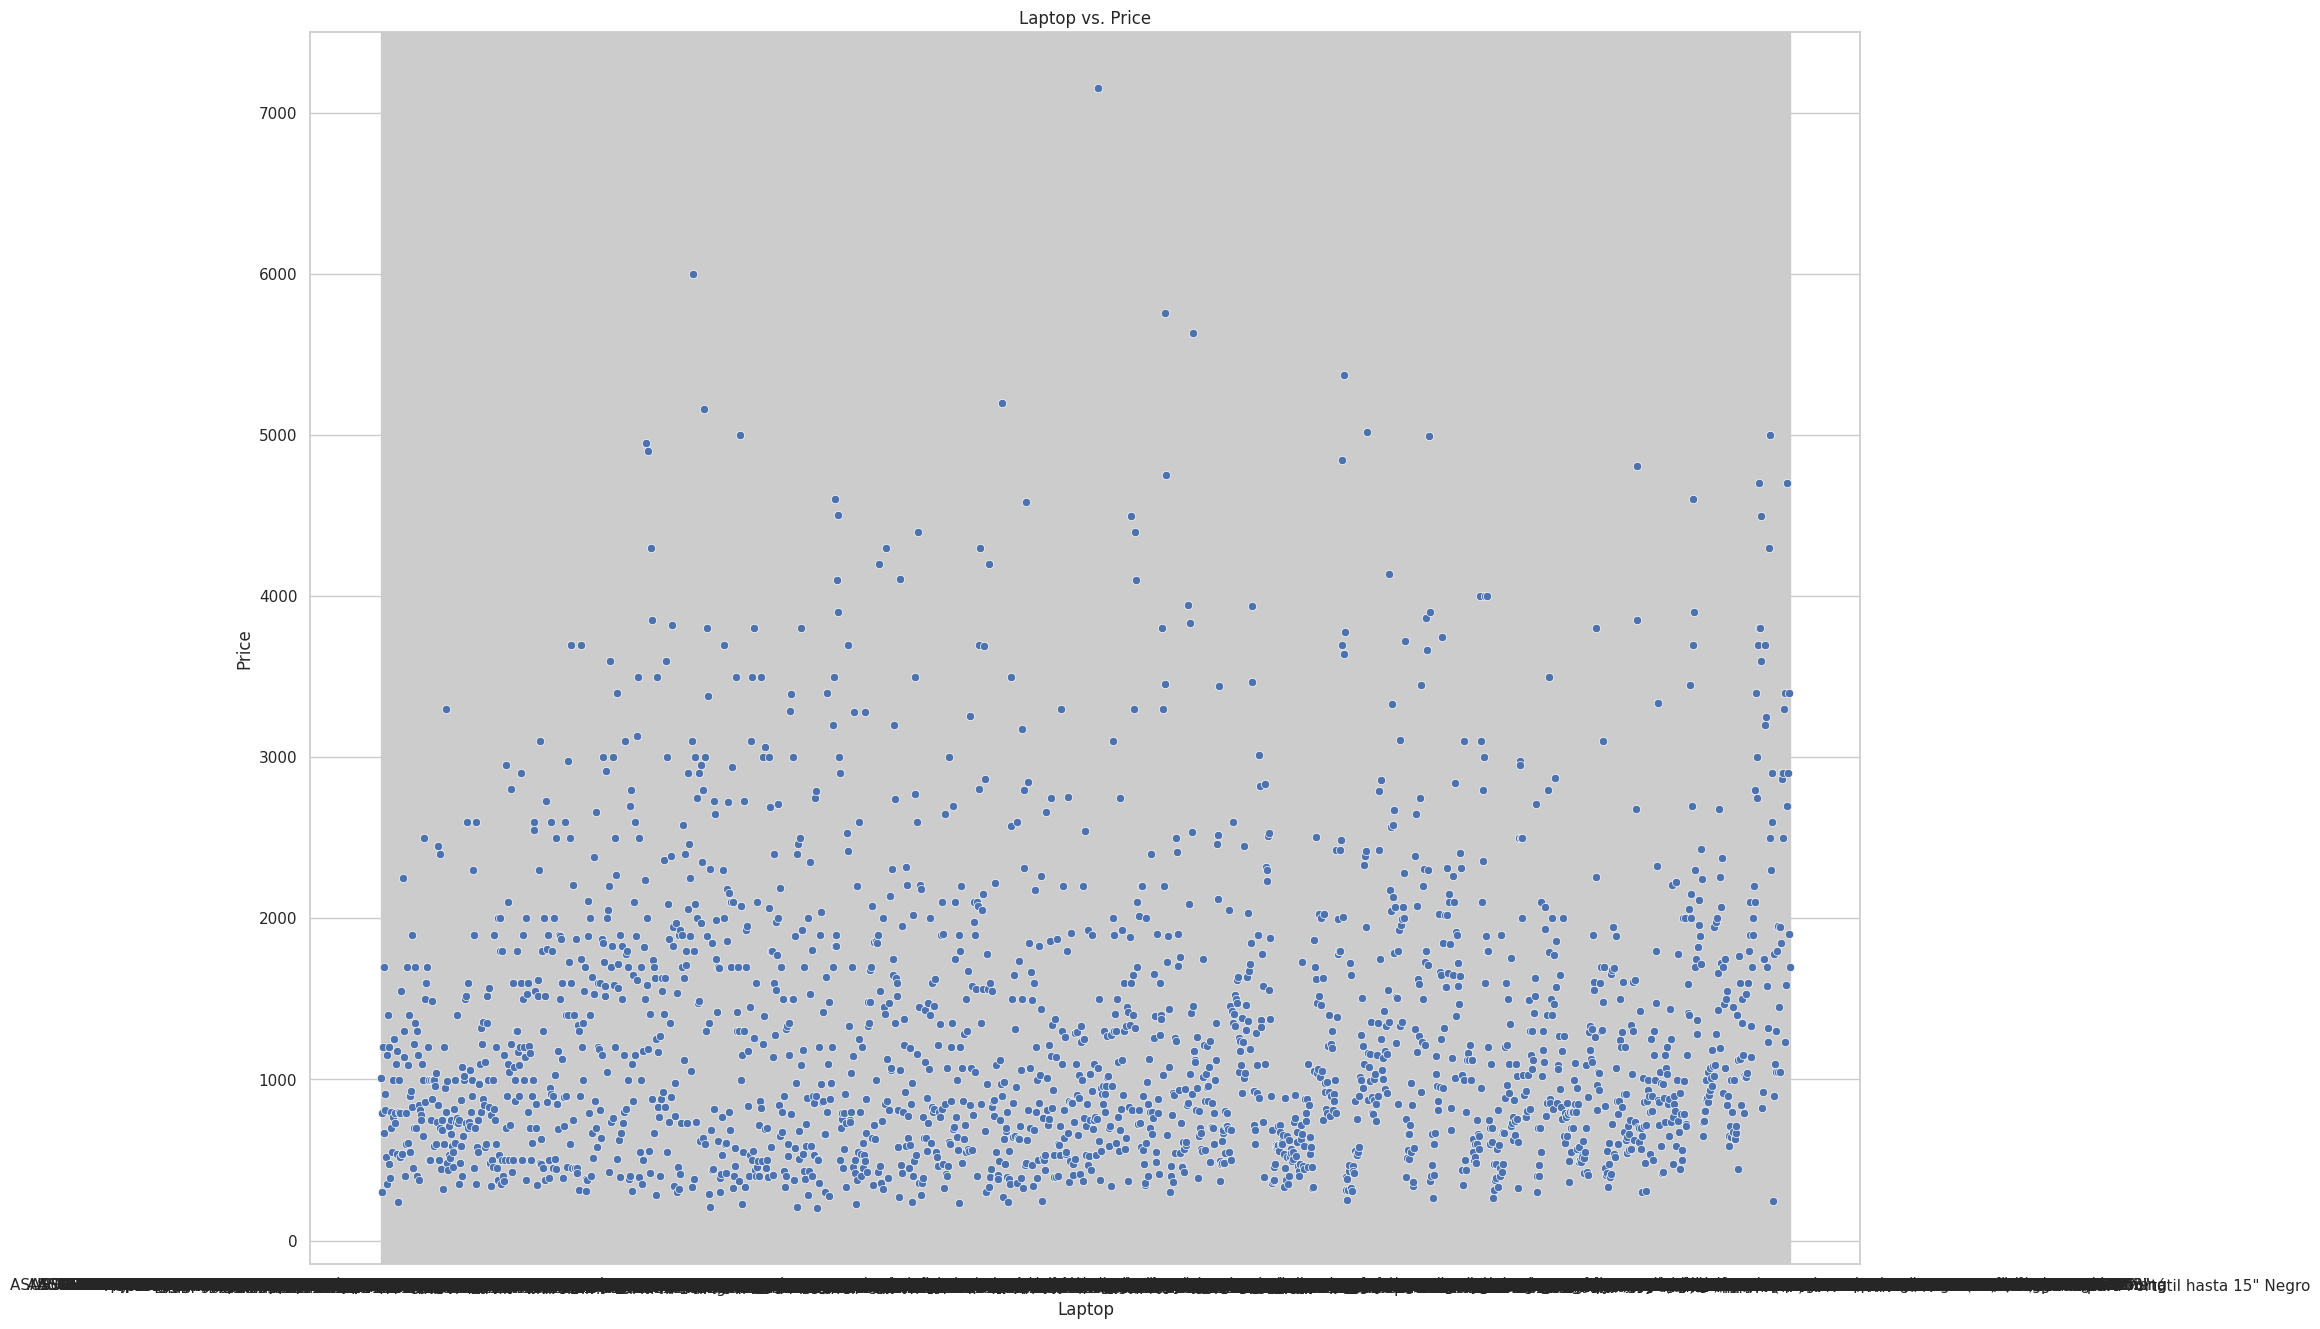

In [ ]:
plt.figure(figsize=(20,16))
sns.scatterplot(data=df, x='Laptop', y='Price')
plt.title('Laptop vs. Price')
plt.xlabel('Laptop')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


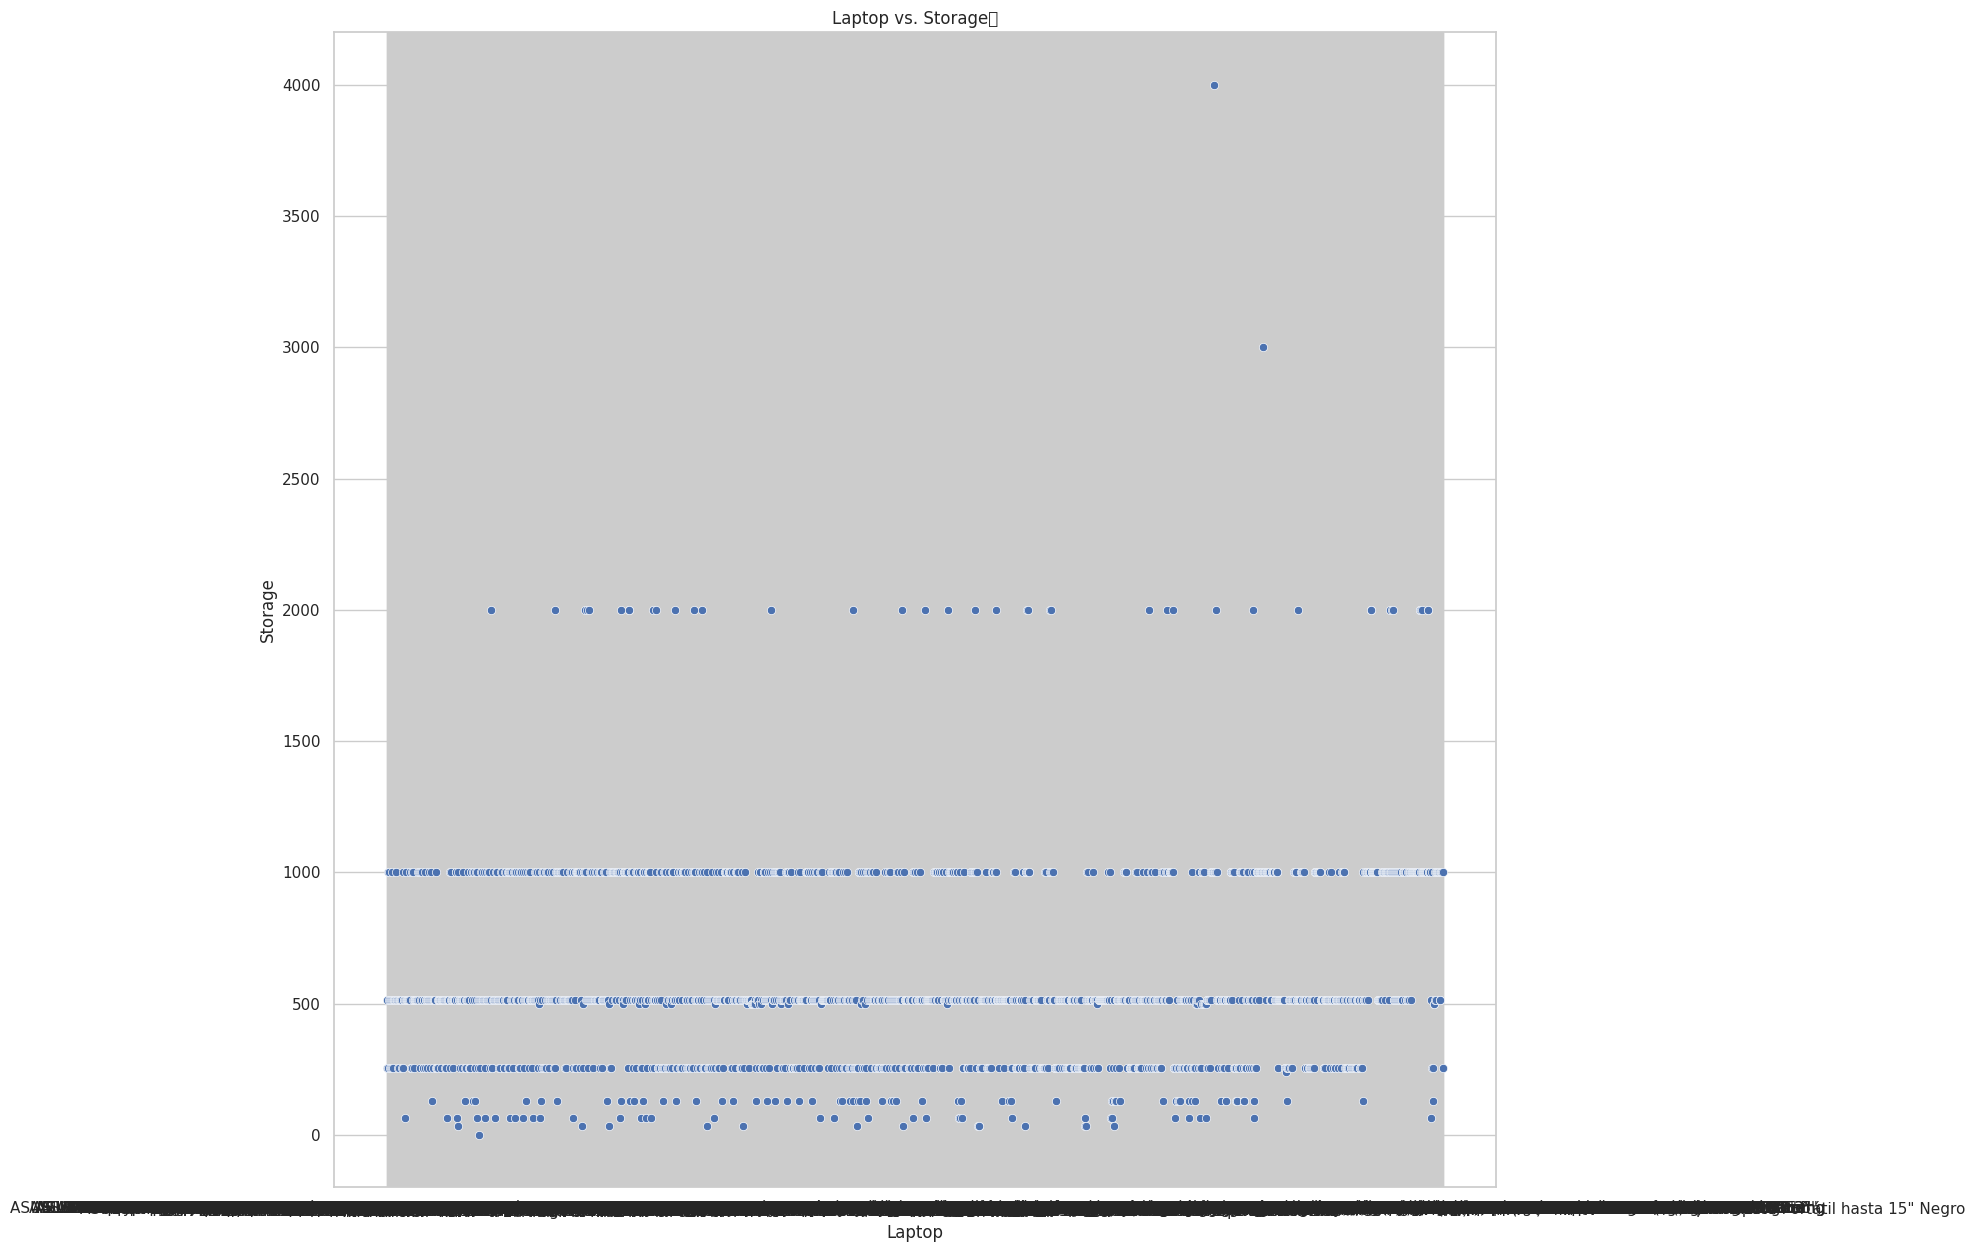

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='Laptop', y='Storage')
plt.title('Laptop vs. Storage	')
plt.xlabel('Laptop')
plt.ylabel('Storage')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assume 'X' contains the feature variables and 'y' contains the target variable (price)
X = df[['RAM', 'Storage','Screen']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([2392.83653808,  359.0077098 , 2448.9435127 , 1322.55910462,
       2378.80979442, 1672.17552609, 1287.43188853,  881.5748226 ,
       1948.53959692, 2333.22287753, 1241.90532859, 4666.76618362,
        881.5748226 ,  937.68179723, 1658.14878244,  655.85930916,
        881.5748226 ,  768.07325842,  881.5748226 , 1241.90532859,
       1672.17552609, 1728.28250072, 1241.90532859, 1658.14878244,
       2343.74293528, 1728.28250072, 1672.17552609,  725.99302745,
        655.85930916, 2378.80979442, 1298.01230322, 2392.83653808,
        655.85930916,  362.51439571, 1612.56186555, 1290.99893139,
       1287.43188853, 2333.22287753,  881.5748226 ,  867.54807895,
       1241.90532859, 1227.87858494,  881.5748226 , 1672.17552609,
        881.5748226 ,  655.85930916,  881.5748226 , 1241.90532859,
        655.85930916,  736.51308519, 1107.36364892, 4701.83304276,
       1721.26912889, 2308.67607613, 1241.90532859,  721.84253406,
       1658.14878244, 2308.67607613,  881.5748226 , 1023.20318

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 442.2886434481971
R-squared: 0.5758917880985218


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 391081.77568476007


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#Recommendation analysis

Recommendation systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies

The recommender system deals with a large volume of information present by filtering the most important information based on the data provided by a user and other factors that take care of the user’s preference and interest. It finds out the match between user and item and imputes the similarities between users and items for recommendation.

Both the users and the services provided have benefited from these kinds of systems. The quality and decision-making process has also improved through these kinds of systems.

In [ ]:
14.#Laptop Recommendations: Build a recommendation system to suggest laptops based on user preferences and requirements.
# Select numerical features for standardization or normalization
numerical_features = ['RAM', 'Storage', 'Screen']

# Standardization
scaler_standardization = StandardScaler()
df_standardized = pd.DataFrame(scaler_standardization.fit_transform(df[numerical_features]), columns=numerical_features)

# Normalization
scaler_normalization = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normalization.fit_transform(df[numerical_features]), columns=numerical_features)



In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


# Select relevant features for recommendations
features = [ 'RAM', 'Storage','Screen']

# Create a scaled and normalized DataFrame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Get user preferences for each feature
user_preferences = {}
for feature in features:
    user_preferences[feature] = float(input(f"Enter your preference for {feature}: "))

# Convert user preferences to a DataFrame
user_df = pd.DataFrame([user_preferences])

# Calculate cosine similarity between user preferences and laptops
similarity_matrix = cosine_similarity(user_df, df_scaled)

# Get laptop recommendations based on similarity
num_recommendations = 5
recommended_indices = similarity_matrix.argsort()[0][-num_recommendations:][::-1]
recommended_laptops = df.iloc[recommended_indices]

# Display recommended laptops
print("Recommended Laptops:")
print(recommended_laptops)

Enter your preference for RAM: 32
Enter your preference for Storage: 1000
Enter your preference for Screen: 17.3
Recommended Laptops:
                                                 Laptop       Status  \
1558  Lenovo ThinkPad T15 Gen 2 Intel Core i7-1185G7...          New   
214   Gigabyte AERO 16 XE5-73ES938HP Intel Core i7-1...          New   
1356  Gigabyte AERO 16 XE5-73PT938HP Intel Core i7-1...          New   
1724  Acer Nitro 5 AN515-58-730H Intel Core i7-12700...  Refurbished   
2076  MSI Modern 15 A10RBS-484XES Intel Core i7-1051...  Refurbished   

         Brand     Model            CPU  RAM  Storage Storagetype       GPU  \
1558    Lenovo  ThinkPad  Intel Core i7   16     2000         SSD    MX 450   
214   Gigabyte      Aero  Intel Core i7   16     2000         SSD  RTX 3070   
1356  Gigabyte      Aero  Intel Core i7   16     2000         SSD  RTX 3070   
1724      Acer     Nitro  Intel Core i7   16     1000         SSD  RTX 3060   
2076       MSI    Modern  Intel Core i

In the above we perform recommendation analysis

In [ ]:
11.# Brand Performance: Assess the performance of different laptop brands based on their specifications and prices.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Group data by laptop brands and calculate summary statistics
brand_stats = df.groupby("Brand").agg({"Price": "mean","RAM": "max"}).reset_index()

In [ ]:
# Sort brands by average price in descending order
brand_stats = brand_stats.sort_values(by="Price", ascending=False)

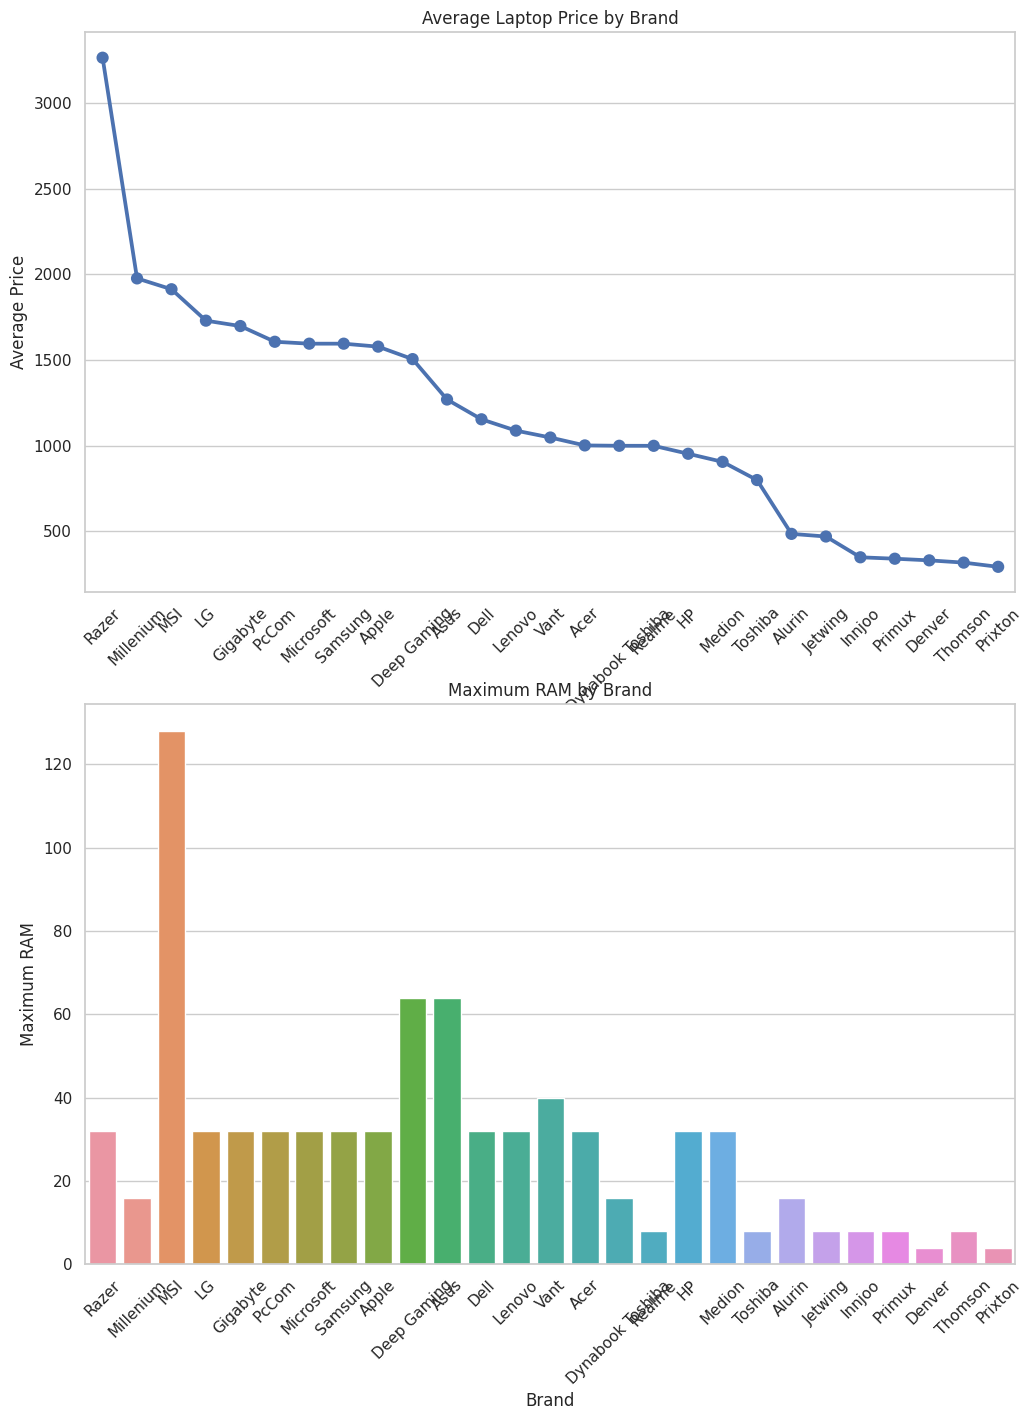

In [ ]:
# Create subplots for visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,16))
# Plot average laptop price by brand
sns.pointplot(data=brand_stats, x="Brand", y="Price", ax=ax1)
ax1.set_title("Average Laptop Price by Brand")
ax1.set_xlabel("Brand")
ax1.set_ylabel("Average Price")
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=brand_stats, x="Brand", y="RAM", ax=ax2)
ax2.set_title("Maximum RAM by Brand")
ax2.set_xlabel("Brand")
ax2.set_ylabel("Maximum RAM")
ax2.tick_params(axis='x', rotation=45)


In [ ]:
# Create a composite performance score based on specifications and prices
brand_stats["performance_score"] = brand_stats["RAM"]+brand_stats["Price"]

In [ ]:
 #Sort brands by performance score in descending order
brand_stats = brand_stats.sort_values(by="performance_score", ascending=False)


In [ ]:
# Print the top-performing brands based on the composite performance score
print("Top-performing brands:")
print(brand_stats.head())

Top-performing brands:
        Brand        Price  RAM  performance_score
21      Razer  3265.701622   32        3297.701622
14        MSI  1913.451006  128        2041.451006
17  Millenium  1976.845000   16        1992.845000
12         LG  1730.028438   32        1762.028438
8    Gigabyte  1698.488958   32        1730.488958


in the above we have top performing Brand ,Price,RAM  based on the performance Score

The Dataset name as "Laptop" firstly we import libararies and then import dataset. In the particular Dataset having 2160 Rows and 12 Columns. we should find any null values in the data set. if any null values are present in the dataset,after loading the dataset if any null values found we perform cleaning.
In this particular dataset we perform python and python libararies like pandas,matplotlib,seaborn.
To start the process for Laptop Recommendation for the Given Dataset ,I have imported The  required libaries.After importing These Libraries we can perform numerical calculations, visualisation and required Machine Learning alogrithms.



Mainly  Using the alogrithm in Machine Learning in this particular data set we use LinearRegression&Logistic regression, Recommended analysis,Descision tree.

In this Dataset Satistical analysis for T-Test also we perform

In this Dataset highest performance of Brands and prediction of which Laptop having high storage ,Screen,RAM,GPU,Price